# 1. Librerias

In [25]:
# Librerias para leer la informacion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Encoder
from sklearn.preprocessing import LabelEncoder

# Entrenamiento
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Informacion de los datos

In [2]:
ruta = 'customer_churn_dataset-training-master.csv'

df = pd.read_csv(ruta)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


* **CustomerID:** Código de identificación del cliente
* **Age:** Edad del cliente (en años)
* **Gender:** Género del cliente (Masculino/Femenino)
* **Tenure:** El período de tiempo que el cliente utiliza el servicio (en meses)
* **Usage Frequency:** La frecuencia con la que el cliente utiliza el servicio (en meses)
* **Support Calls:** Frecuencia de llamadas del cliente al servicio de atención
* **Payment Delay:** El período de retraso en el pago de las facturas del servicio por parte de los clientes (en meses)
* **Subscription Type:** El tipo de servicio seleccionado por el cliente (Básico/Estándar/Premium)
* **Contract Length:** El período de contrato del servicio seleccionado por el cliente (Mensual/Trimestral/Anual)
* **Total Spend:** Dinero total gastado por el cliente en el servicio (en USD)
* **Last Interaction:** El período de tiempo desde el último uso del cliente hasta el presente (en meses)
* **Churn:** El estado actual del cliente, continúa con el servicio (0) o lo abandona (1)

# 3. Preprocesamiento de datos

In [3]:
df.shape

(440833, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
# Verificar si hay duplicados
df.duplicated().sum()

np.int64(0)

In [6]:
# Verificar si hay datos faltantes
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
# Muestra en que fila esta el valor nulo
df[df.isnull().any(axis= 1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remover el valor faltante y reiniciar el indice
df = df.drop(labels= 199295, axis= 0).reset_index()
df.head()

,index,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [9]:
df = df.drop(columns= ['index'])
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
# Verificamos si hay datos faltantes
df[df.isnull().any(axis= 1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [12]:
# Eliminando la columna CustomerID ya que no es necesaria para el modelado.
df = df.drop(columns= ['CustomerID'])
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [14]:
# Lista de las columnas
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [15]:
# Imprimiendo los valores únicos en todas las columnas menos las numericas.

caracteristicas_numericas = ['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction']

for col in df.columns:
    if col not in caracteristicas_numericas:
        print(col, df[col].unique())
        print("-" * 100)

Gender ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Subscription Type ['Standard' 'Basic' 'Premium']
----------------------------------------------------------------------------------------------------
Contract Length ['Annual' 'Monthly' 'Quarterly']
----------------------------------------------------------------------------------------------------
Churn [1. 0.]
----------------------------------------------------------------------------------------------------


# 4. EDA (Análisis Exploratorio de Datos)

In [16]:
# Informacion de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


In [17]:
# Inforamcion de los objetos en los datos
df.describe(include= 'object').T

,count,unique,top,freq
Gender,440832,2,Male,250252
Subscription Type,440832,3,Standard,149128
Contract Length,440832,3,Annual,177198


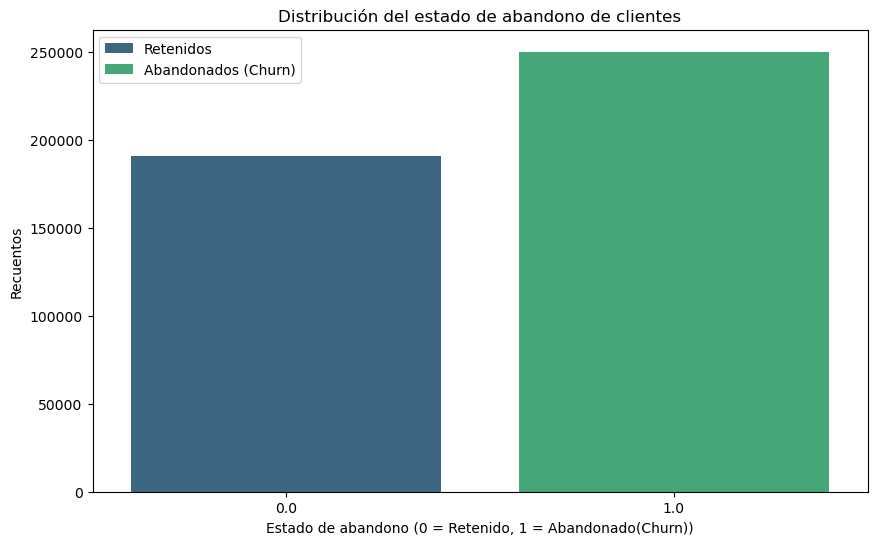

In [18]:
# Información del estado actual del cliente
plt.figure(figsize= (10, 6))
sns.countplot(data= df, x= 'Churn', hue= 'Churn',palette= 'viridis')
plt.title('Distribución del estado de abandono de clientes')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado(Churn))')
plt.ylabel('Recuentos')
plt.legend(['Retenidos', 'Abandonados (Churn)']);

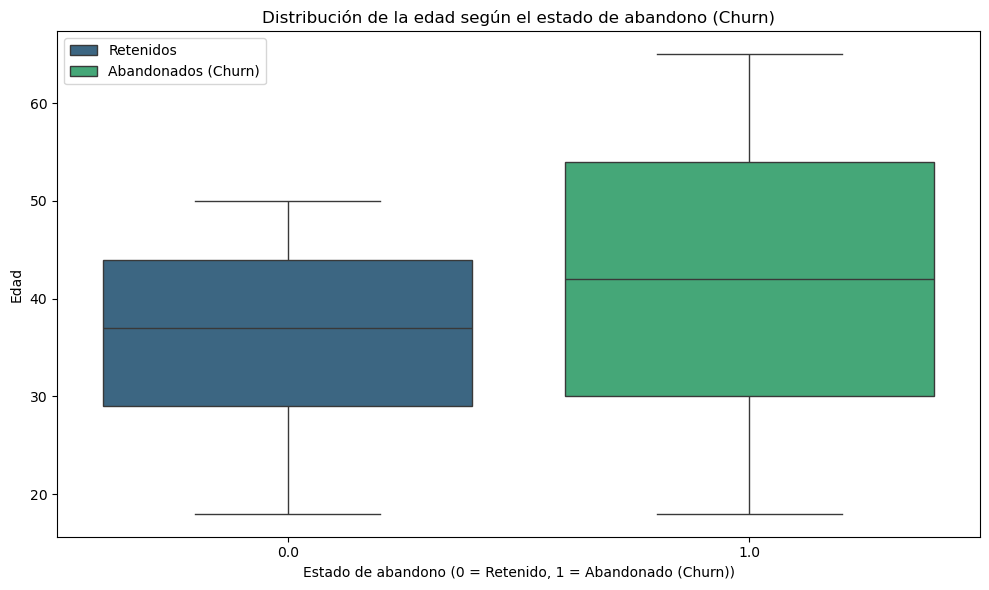

In [19]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Age', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de la edad según el estado de abandono (Churn)')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado (Churn))')
plt.ylabel('Edad')
plt.legend(['Retenidos', 'Abandonados (Churn)']);
plt.tight_layout();

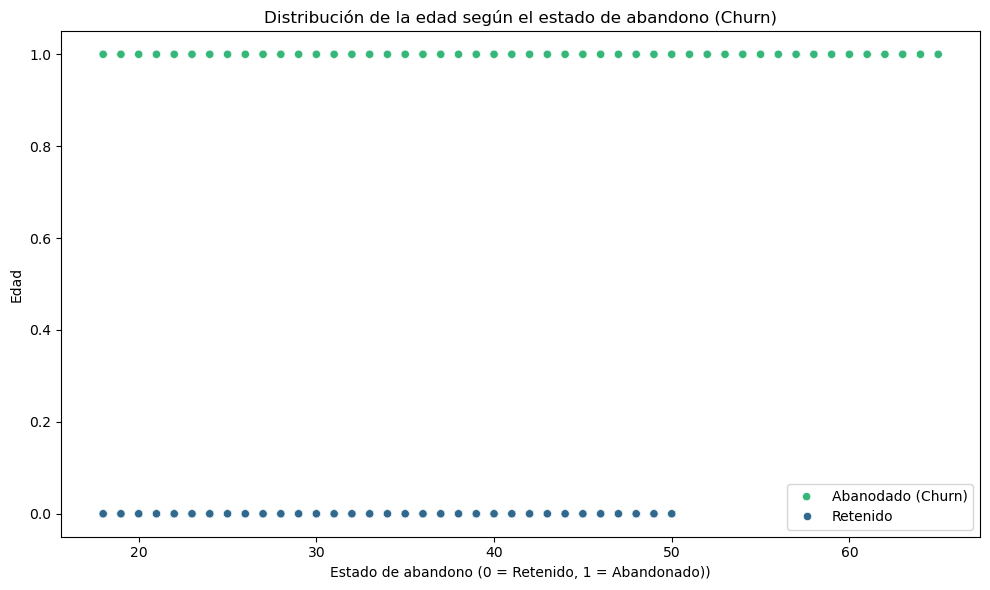

In [20]:
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df, x= 'Age', y= 'Churn', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de la edad según el estado de abandono (Churn)')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Edad')
plt.legend(labels= ['Abanodado (Churn)', 'Retenido'])
plt.tight_layout();

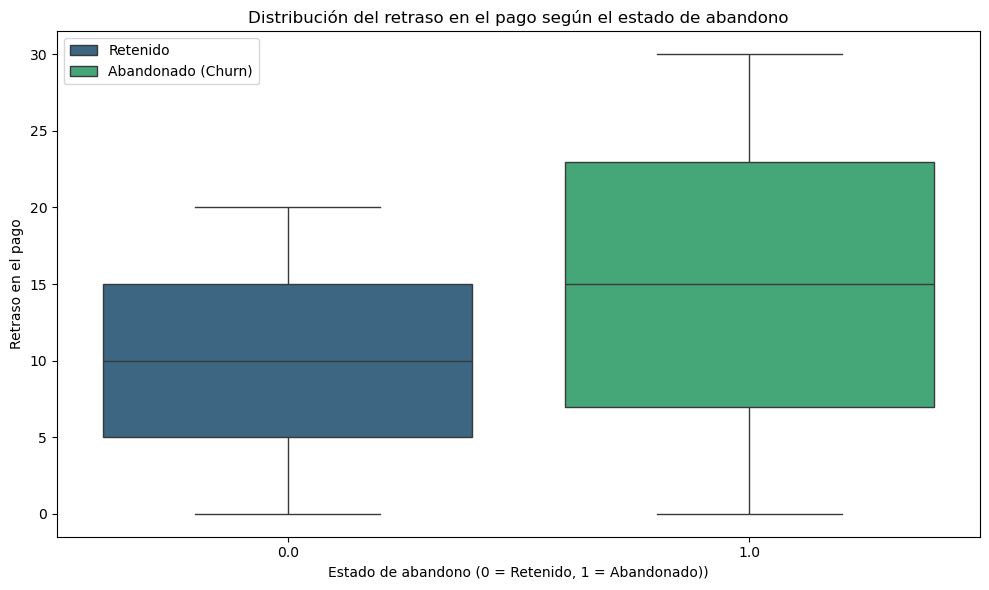

In [21]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Payment Delay', hue= 'Churn', palette= 'viridis')
plt.title('Distribución del retraso en el pago según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Retraso en el pago')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

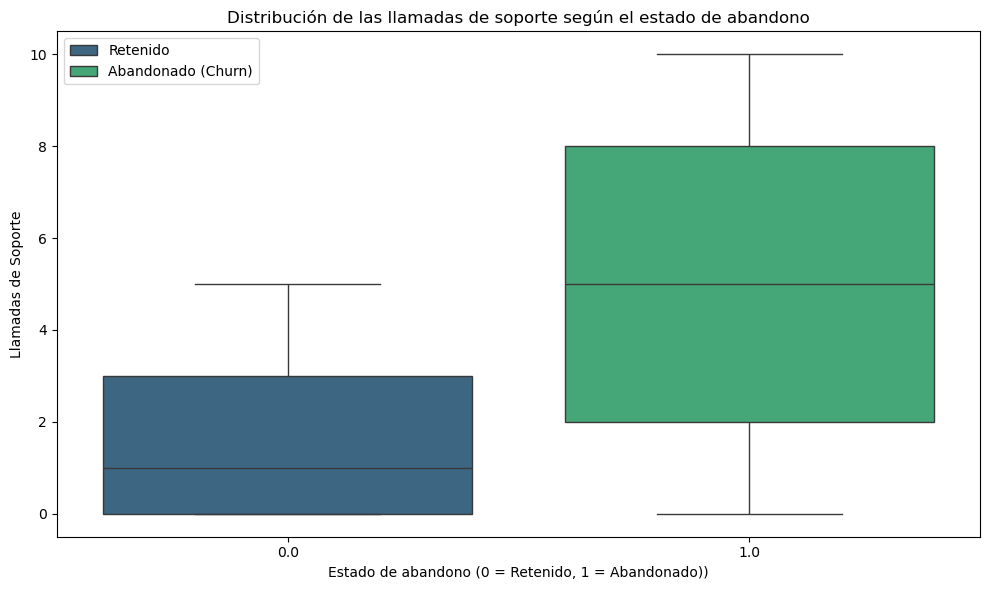

In [22]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Support Calls', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de las llamadas de soporte según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Llamadas de Soporte')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

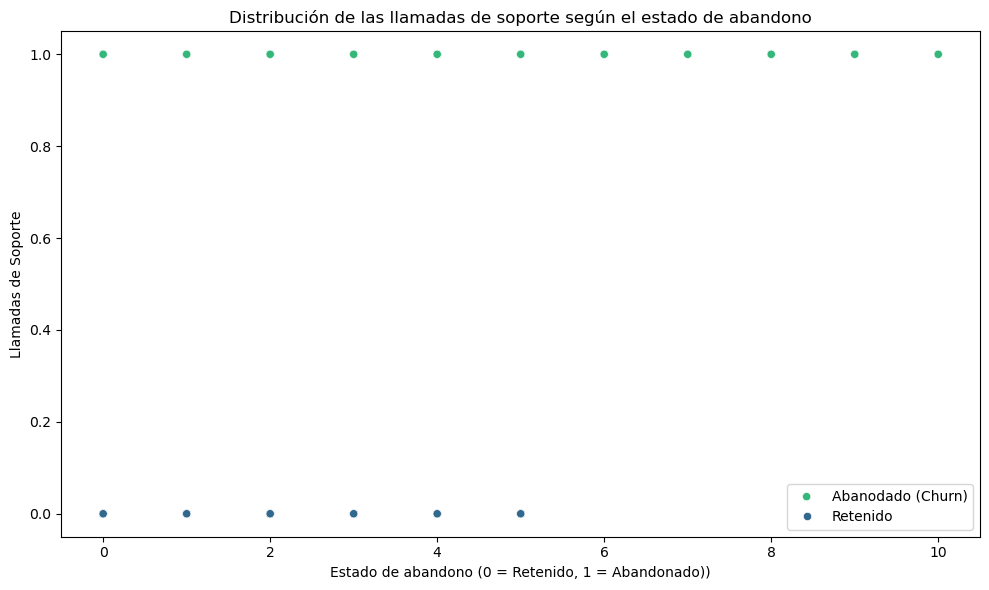

In [23]:
plt.figure(figsize= (10, 6))
sns.scatterplot(data= df, x= 'Support Calls', y= 'Churn', hue= 'Churn', palette= 'viridis')
plt.title('Distribución de las llamadas de soporte según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Llamadas de Soporte')
plt.legend(labels= ['Abanodado (Churn)', 'Retenido'])
plt.tight_layout();

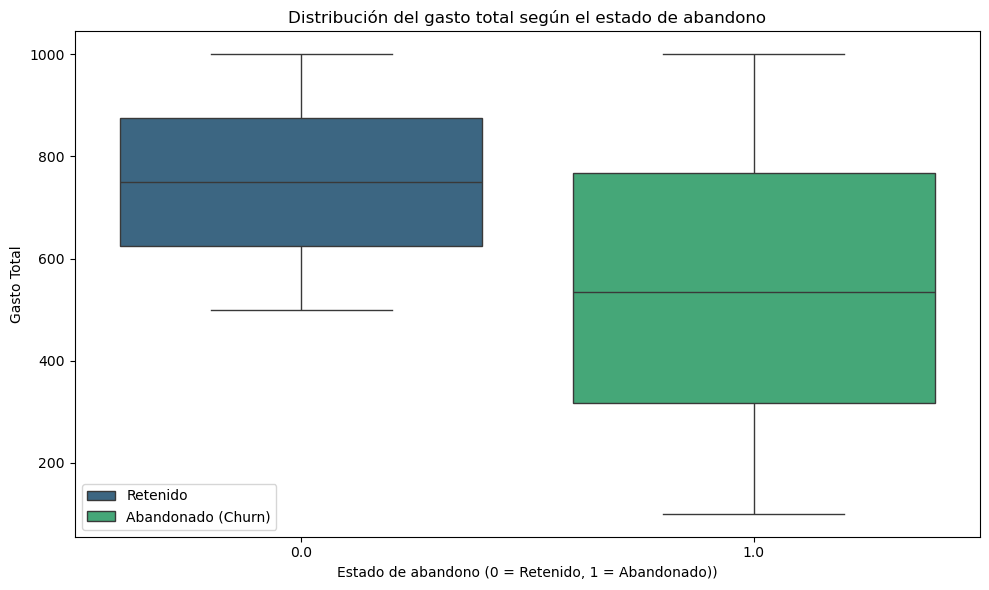

In [24]:
plt.figure(figsize= (10, 6))
sns.boxplot(data= df, x= 'Churn', y= 'Total Spend', hue= 'Churn', palette= 'viridis')
plt.title('Distribución del gasto total según el estado de abandono')
plt.xlabel('Estado de abandono (0 = Retenido, 1 = Abandonado))')
plt.ylabel('Gasto Total')
plt.legend(labels= ['Retenido', 'Abandonado (Churn)'])
plt.tight_layout();

# 5. Preprocesamiento antes del Modelado

In [26]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [27]:
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [29]:
# Columnas categoricas
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length']

# Copia del DataFrame
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

correlations = df_encoded.corr()['Churn'].sort_values(ascending = False)
print('\nCorrelation with target (Churn):')
print(correlations)


Correlation with target (Churn):
Churn                1.000000
Support Calls        0.574267
Payment Delay        0.312129
Age                  0.218394
Last Interaction     0.149616
Contract Length     -0.000093
Subscription Type   -0.017181
Usage Frequency     -0.046101
Tenure              -0.051919
Gender              -0.175395
Total Spend         -0.429355
Name: Churn, dtype: float64


In [30]:
df_encoded.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


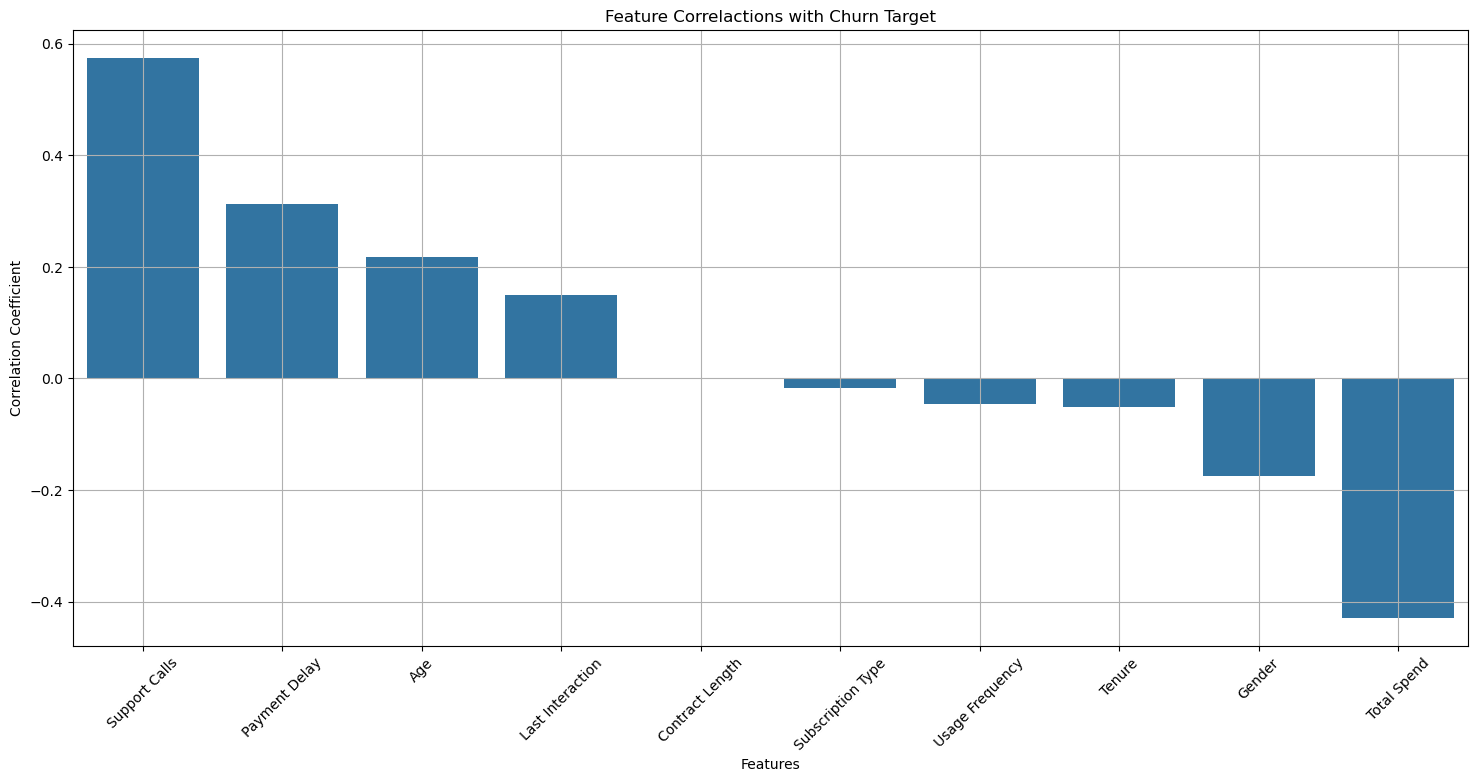

In [31]:
plt.figure(figsize= (18, 8))
correlations_df = pd.DataFrame(correlations[1:])
correlations_df.columns = ['Correlation with Churn']
sns.barplot(data= correlations_df.reset_index(), x= 'index', y= 'Correlation with Churn')
plt.title('Feature Correlactions with Churn Target')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation= 45)
plt.grid();

In [33]:
# Definir variables
# Variable independientes
X = df_encoded.drop('Churn', axis= 1)

In [34]:
# Variable dependiente, la que queremos descubrir
y = df_encoded['Churn']

In [35]:
# Crear grupo de entrenamieto y grupo de prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y,
                                                           train_size= 0.7, # 70 de entrenamiento y 30 de prueba
                                                           random_state= 42)

In [36]:
# Algoritmo de bosque aleatorio
forest = RandomForestClassifier()
forest.fit(X_entrena, y_entrena)

RandomForestClassifier()

In [37]:
# Verificar la confiabilidad del modelo con score
forest.score(X_prueba, y_prueba)

0.9996370510396976

In [39]:
y_pred = forest.predict(X_prueba)
y_pred

array([1., 1., 1., ..., 1., 0., 1.], shape=(132250,))

In [40]:
print("Accuracy:", accuracy_score(y_prueba, y_pred))
print("Precision:", precision_score(y_prueba, y_pred))
print("Recall:", recall_score(y_prueba, y_pred))
print("F1 Score:", f1_score(y_prueba, y_pred))

Accuracy: 0.9996370510396976
Precision: 0.9999733496788636
Recall: 0.9993874017845252
F1 Score: 0.9996802898705174


In [122]:
datos = {
    "tiempo_contrato_meses": 12,
    "retrasos_pago": 2,
    "uso_mensual": 14.5,
    "plan": 1 #"Premium"
}

In [123]:
nuevos_datos = pd.DataFrame({
    'Age': df_encoded['Age'].mean(),
    'Gender':df_encoded['Gender'].mean(),
    'Tenure': df_encoded['Tenure'].mean(),
    "Usage Frequency": datos["uso_mensual"],
    'Support Calls': df_encoded['Support Calls'].mean(),
    "Payment Delay": datos["retrasos_pago"],
    "Subscription Type": datos["plan"],
    "Contract Length": datos["tiempo_contrato_meses"],  
    'Total Spend': df_encoded['Total Spend'].mean(),
    'Last Interaction': df_encoded['Last Interaction'].mean(),
    'Gender': df_encoded['Gender'].mean() 
         
}, index= [0])
nuevos_datos

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,39.373153,0.567681,31.256336,14.5,3.604437,2,1,12,631.616223,14.480868


In [124]:
# Otro metodo de prediccion predict_proba
probabilidades = forest.predict_proba(nuevos_datos)
probabilidades # Tupla(posibilidad de ser legitimo, posibilidad de ser fraudulenta)

array([[0.09, 0.91]])

In [126]:
print(f'Probabilidades de no va a cancelar: {probabilidades[0][0] *100}')
print(f'Probabilidades de cancelar: {probabilidades[0][1] * 100}')

Probabilidades de no va a cancelar: 9.0
Probabilidades de cancelar: 91.0


In [127]:
log_reg = LogisticRegression()
log_reg.fit(X_entrena, y_entrena)

/home/ser2k2/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()